In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Rotten Tomatoes Movies.csv')

# Display the first few rows of the dataset
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [70]:
# Check for missing values
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [71]:
# Drop rows with missing required fields
df.dropna(subset=['movie_title', 'rating', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'genre', 'runtime_in_minutes','audience_rating','audience_count'], inplace=True)
# Remove leading/trailing whitespace and ensure consistent capitalization
df['movie_title'] = df['movie_title'].str.strip().str.title()
# Check again for missing values
df.isnull().sum()

movie_title              0
movie_info              16
critics_consensus     8038
rating                   0
genre                    0
directors              100
writers               1265
cast                   258
in_theaters_date       683
on_streaming_date        1
runtime_in_minutes       0
studio_name            366
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
audience_count           0
dtype: int64

In [72]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & The Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


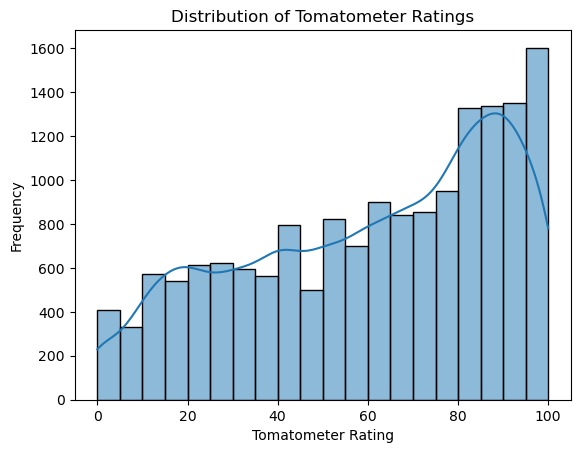

In [73]:
sns.histplot(df['tomatometer_rating'], bins=20, kde=True)
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.show()

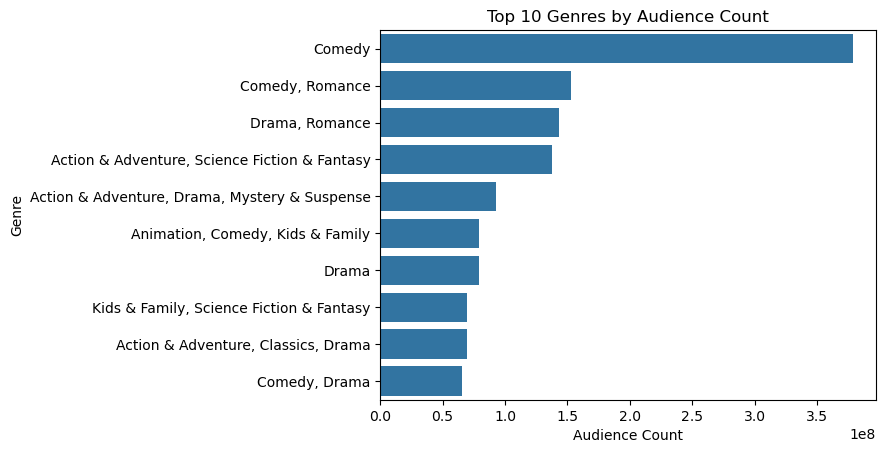

In [74]:
top_genres = df.groupby('genre')['audience_count'].sum().nlargest(10).sort_values(ascending=False)
top_genres_df = top_genres.reset_index()
sns.barplot(y='genre', x='audience_count', data=top_genres_df, order=top_genres_df['genre'])
plt.title('Top 10 Genres by Audience Count')
plt.xlabel('Audience Count')
plt.ylabel('Genre')
plt.show()

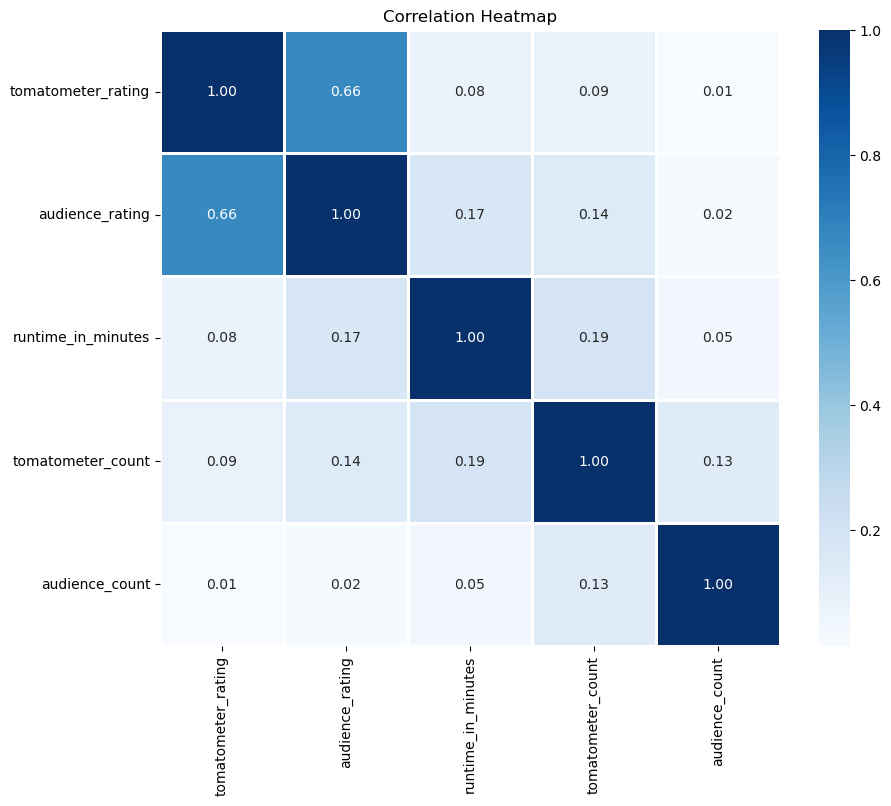

In [75]:
numerical_columns = df[['tomatometer_rating', 'audience_rating', 'runtime_in_minutes', 'tomatometer_count', 'audience_count']]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [76]:
# Descriptive statistics
df.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16222.000000,16222.000000,16222.000000,16222.000000,1.622200e+04
mean,102.577056,60.441807,57.073172,60.517815,1.539733e+05
std,25.037385,28.567549,66.324549,20.448462,1.826841e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.820000e+02
50%,99.000000,66.000000,29.000000,63.000000,4.955500e+03
75%,111.000000,86.000000,77.000000,78.000000,2.947200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


In [77]:
df['genre'].value_counts()

# most movies are drama and comedy

genre
Drama                                                                                       1666
Comedy                                                                                      1143
Comedy, Drama                                                                                808
Drama, Mystery & Suspense                                                                    673
Art House & International, Drama                                                             563
                                                                                            ... 
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Kids & Family, Science Fiction & Fantasy, Sports & Fitness                              1
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy            1
Action & Adventure, Cult Movies, Drama, Science Fiction & Fantasy                              1
Animation, Drama, Romanc

In [78]:
df['rating'].value_counts()

# most movies are rated R

rating
R         6070
NR        4582
PG-13     2834
PG        2043
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64